In [1]:
import pickle
import numpy as np

In [2]:
with open("data/train_x", "rb") as fp:
    train_x = pickle.load(fp)
with open("data/train_ys", "rb") as fp:
    train_ys = pickle.load(fp)
with open("data/train_yp", "rb") as fp:
    train_yp = pickle.load(fp)
with open("data/train_yn", "rb") as fp:
    train_yn = pickle.load(fp)

In [3]:
with open("data/test_x", "rb") as fp:
    test_x = pickle.load(fp)
with open("data/test_ys", "rb") as fp:
    test_ys = pickle.load(fp)
with open("data/test_yp", "rb") as fp:
    test_yp = pickle.load(fp)
with open("data/test_yn", "rb") as fp:
    test_yn = pickle.load(fp)

In [4]:
train_x_n = [np.ndarray.tolist(train_x[0][0][0].asnumpy())]
for l in range(1,len(train_x)):
    train_x_n.append(np.ndarray.tolist(train_x[l][0][0].asnumpy()))

In [5]:
test_x_n = [np.ndarray.tolist(test_x[0][0][0].asnumpy())]
for l in range(1,len(test_x)):
    test_x_n.append(np.ndarray.tolist(test_x[l][0][0].asnumpy()))

### Subjectivity

In [6]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(train_x_n, train_ys)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
pred = clf.predict(test_x_n)

In [8]:
accuracy = clf.score(test_x_n, test_ys)
print(accuracy)

0.6890173410404624


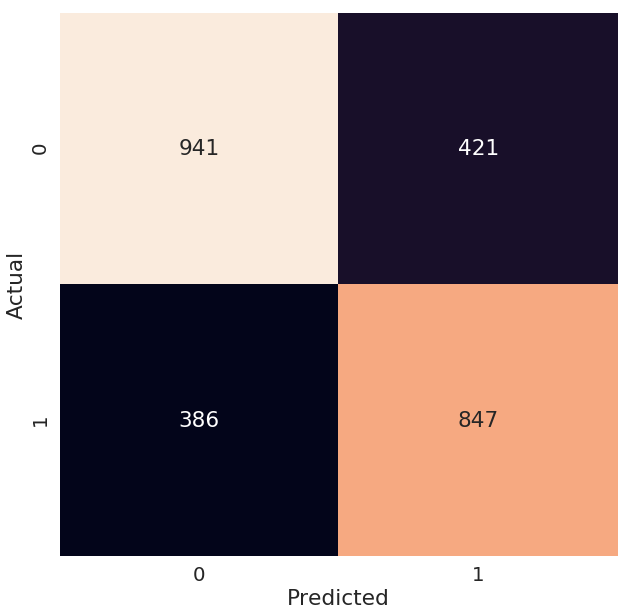

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_mat = confusion_matrix(test_ys, pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.8)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Positivity

In [11]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(train_x_n, train_ys)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
pred = clf.predict(test_x_n)

In [13]:
accuracy = clf.score(test_x_n, test_yp)
print(accuracy)

0.5865125240847784


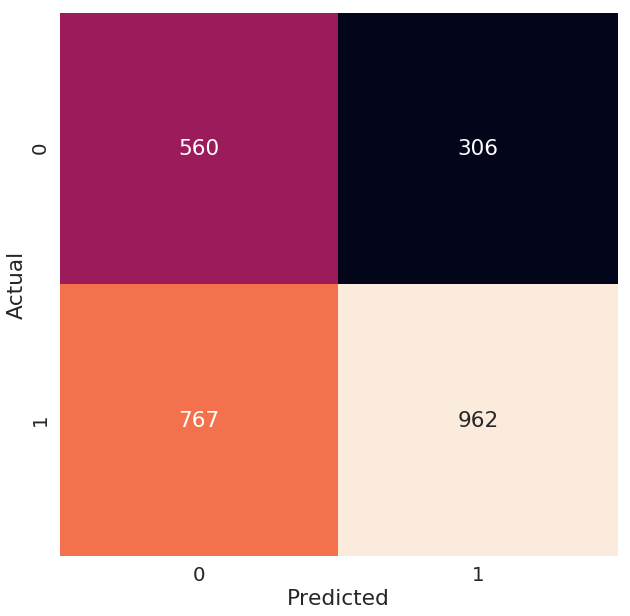

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_yp, pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.8)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Negativity

In [15]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(train_x_n, train_ys)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
pred = clf.predict(test_x_n)

In [17]:
accuracy = clf.score(test_x_n, test_yn)
print(accuracy)

0.5483622350674374


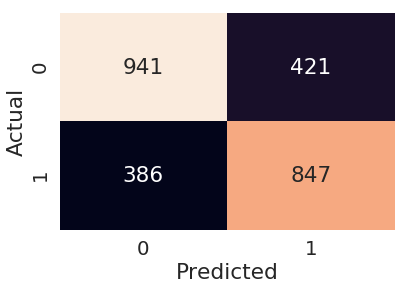

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_ys, pred)
sns.set(font_scale=1.8)
sns.heatmap(conf_mat, annot=True, fmt='d',cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()